In [1]:
import numpy as np
import pandas as pd
import random
import sys
import time
import numpy.linalg as nlg
import math
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx

In [2]:
df = pd.read_csv('full_music_data.csv')
df

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,['ZZ Top'],[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster
98336,['ZZ Top'],[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love
98337,['ZZ Top'],[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese
98338,['ZZ Top'],[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster


In [3]:
data = pd.concat([df.iloc[:,2:7],df.iloc[:,8:13]], axis=1)
data['tempo'] = (data['tempo']-data['tempo'].min())/(data['tempo'].max() - data['tempo'].min())
data['loudness'] = (data['loudness']-data['loudness'].min())/(data['loudness'].max() - data['loudness'].min())
data['key'] = (data['key']-data['key'].min())/(data['key'].max() - data['key'].min())
data

,danceability,energy,valence,tempo,loudness,key,acousticness,instrumentalness,liveness,speechiness
0,0.600,0.365,0.131,0.532777,0.736022,0.818182,0.06720,0.585000,0.0921,0.0498
1,0.874,0.326,0.179,0.490063,0.732587,1.000000,0.01360,0.148000,0.0993,0.1310
2,0.670,0.531,0.336,0.571037,0.811574,0.818182,0.01560,0.345000,0.3060,0.0377
3,0.761,0.702,0.850,0.429237,0.807558,0.636364,0.10800,0.000031,0.0935,0.0389
4,0.661,0.828,0.902,0.471455,0.742454,1.000000,0.27600,0.000001,0.2870,0.0390
...,...,...,...,...,...,...,...,...,...,...
98335,0.276,0.892,0.715,0.329693,0.830902,1.000000,0.40900,0.000000,0.7140,0.0893
98336,0.700,0.592,0.906,0.450025,0.777579,1.000000,0.10800,0.018400,0.1180,0.0681
98337,0.709,0.709,0.863,0.456977,0.752651,0.181818,0.11800,0.000011,0.1250,0.0370
98338,0.552,0.651,0.533,0.661835,0.774598,0.363636,0.00494,0.034900,0.1320,0.2290


In [4]:
# Z-score
data_use = (data-data.mean())/(data.std()) 
data_use

,danceability,energy,valence,tempo,loudness,key,acousticness,instrumentalness,liveness,speechiness
0,0.449176,-0.639930,-1.555980,0.370169,-0.459199,1.087287,-0.994756,1.686007,-0.617400,-0.184035
1,2.119573,-0.787390,-1.370321,0.021770,-0.502415,1.657618,-1.146292,0.082297,-0.578712,0.882922
2,0.875920,-0.012280,-0.763062,0.682245,0.491145,1.087287,-1.140637,0.805251,0.531955,-0.343027
3,1.430686,0.634275,1.225033,-0.474364,0.440628,0.516955,-0.879408,-0.460721,-0.609878,-0.327259
4,0.821053,1.110684,1.426163,-0.130008,-0.378294,1.657618,-0.404445,-0.460830,0.429862,-0.325945
...,...,...,...,...,...,...,...,...,...,...
98335,-1.526038,1.352670,0.702868,-1.286316,0.734256,1.657618,-0.028432,-0.460835,2.724274,0.334990
98336,1.058810,0.218362,1.441635,-0.304809,0.063529,1.657618,-0.879408,-0.393311,-0.478231,0.056425
98337,1.113677,0.660742,1.275316,-0.248101,-0.250029,-0.908874,-0.851136,-0.460795,-0.440618,-0.352225
98338,0.156552,0.441443,-0.001088,1.422853,0.026037,-0.338542,-1.170775,-0.332759,-0.403004,2.170629


In [5]:
def fa(mydata):

    #计算样本相关系数矩阵
    #print(np.shape(mydata))
    R = mydata.corr()

    #构造因子变量
    eig_value, eigvector = nlg.eig(R)  # 求矩阵R的全部特征值，构成向量E
    #print(eig_value, eigvector)
    eig = pd.DataFrame()
    eig['names'] = mydata.columns
    eig['eig_value'] = eig_value
    eig.sort_values('eig_value', ascending=False, inplace=True)

    # 求因子模型的因子载荷阵，寻找主因子个数m
    for m in range(1, 10):
        if eig['eig_value'][:m].sum() / eig['eig_value'].sum() >= 0.55:
            s = eig['eig_value'][:m].sum()/ eig['eig_value'].sum()
            print(m,s)
            break

    # 因子载荷矩阵
    A = np.mat(np.zeros((10, 3)))
    for i in range(3):
        A[:, i] = (math.sqrt(eig_value[i]) * eigvector[:, i]).reshape(10, 1)

    a = pd.DataFrame(A)
    a.columns = ['factor1', 'factor2', 'factor3']


    #旋转载荷因子矩阵
    fa = FactorAnalyzer(3,rotation='varimax')
    fa.fit(mydata)

    # 给出贡献率,第一行表示特征值方差，第二行表示贡献率，第三行表示累计贡献率
    var = fa.get_factor_variance()
    for i in range(0,3):
        print(var[i])
    df = fa.loadings_
    df = pd.DataFrame(df)
    df.to_csv('factor loadings.csv')

    #主因子方差 ， 特殊因子方差，因子的方差贡献度 ，反映公共因子对所有变量的贡献
    fa.get_communalities()

    #计算因子得分
    fa_t_score = np.dot(np.mat(mydata), np.mat(fa.loadings_))
    B = pd.DataFrame(fa_t_score)
    #print("\n因子得分：\n",B)
    B.to_csv('factor_score.csv')

    return B

In [6]:
new_data = fa(data_use)
new_data = np.array(new_data)

3 0.5525262247662016
[2.25420543 1.47987562 0.50941447]
[0.22542054 0.14798756 0.05094145]
[0.22542054 0.3734081  0.42434955]


In [7]:
new_data

array([[-0.95916922, -0.77608994, -0.59486479],
       [-0.66465226,  1.46262648, -0.00990387],
       [ 1.07192856,  0.4828387 ,  0.03146902],
       ...,
       [ 1.33254305,  2.12312239, -0.26555536],
       [ 1.739246  ,  0.69428376,  1.22383271],
       [ 3.03810448,  1.33533606,  0.3969051 ]])

In [94]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5,covariance_type ='diag')
gmm.fit(new_data)

GaussianMixture(covariance_type='diag', n_components=5)

In [95]:
pred = list(gmm.predict(new_data))
ab =  list(set([i for i in pred]))

In [114]:
pred = pd.DataFrame(gmm.predict(new_data))
df_data = pd.DataFrame(new_data) 
cluster = pd.concat([df_data,pred], axis=1)
points = np.array(cluster)
cluster.columns = ['f1','f2','f3','type']
cluster

,f1,f2,f3,type
0,-0.959169,-0.776090,-0.594865,0
1,-0.664652,1.462626,-0.009904,4
2,1.071929,0.482839,0.031469,4
3,1.809083,2.610395,-0.274728,4
4,1.536923,1.846327,0.263722,3
...,...,...,...,...
98335,2.121040,-0.838310,1.645456,1
98336,1.247093,2.228168,-0.063935,4
98337,1.332543,2.123122,-0.265555,4
98338,1.739246,0.694284,1.223833,1


In [11]:
df1 = pd.read_csv('full_data.csv',encoding='unicode_escape')
df1

C:\Users\olivia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,artist_names,artists_id,gerne,danceability,energy,valence,tempo,loudness,mode,key,...,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Unnamed: 20
0,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.600,0.365,0.131,130.046,-13.083,0,9,...,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,NaN
1,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.874,0.326,0.179,119.620,-13.302,0,11,...,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,NaN
2,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.670,0.531,0.336,139.385,-8.267,0,9,...,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,NaN
3,"""Alexander O'Neal""",625201.0,R&B;,0.761,0.702,0.850,104.773,-8.523,1,7,...,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,NaN
4,"""Alexander O'Neal""",625201.0,R&B;,0.661,0.828,0.902,115.078,-12.673,0,11,...,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,ZZ Top',690254.0,Pop/Rock,0.276,0.892,0.715,80.475,-7.035,1,11,...,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,NaN
98336,ZZ Top',690254.0,Pop/Rock,0.700,0.592,0.906,109.847,-10.434,1,11,...,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,NaN
98337,ZZ Top',690254.0,Pop/Rock,0.709,0.709,0.863,111.544,-12.023,1,2,...,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese,NaN
98338,ZZ Top',690254.0,Pop/Rock,0.552,0.651,0.533,161.548,-10.624,0,4,...,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,NaN


In [134]:
add = df1[['artist_names','artists_id','gerne','year']]
add

,artist_names,artists_id,gerne,year
0,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2005
1,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2005
2,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2009
3,"""Alexander O'Neal""",625201.0,R&B;,1991
4,"""Alexander O'Neal""",625201.0,R&B;,1987
...,...,...,...,...
98335,ZZ Top',690254.0,Pop/Rock,1975
98336,ZZ Top',690254.0,Pop/Rock,1976
98337,ZZ Top',690254.0,Pop/Rock,1987
98338,ZZ Top',690254.0,Pop/Rock,1992


In [136]:
result = pd.concat([add,cluster], axis=1)
#result.head(20)
#result.to_csv('result.csv')
result

,artist_names,artists_id,gerne,year,f1,f2,f3,type
0,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2005,-0.959169,-0.776090,-0.594865,0
1,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2005,-0.664652,1.462626,-0.009904,4
2,"""Fat Freddy's Drop""",178301.0,Pop/Rock,2009,1.071929,0.482839,0.031469,4
3,"""Alexander O'Neal""",625201.0,R&B;,1991,1.809083,2.610395,-0.274728,4
4,"""Alexander O'Neal""",625201.0,R&B;,1987,1.536923,1.846327,0.263722,3
...,...,...,...,...,...,...,...,...
98335,ZZ Top',690254.0,Pop/Rock,1975,2.121040,-0.838310,1.645456,1
98336,ZZ Top',690254.0,Pop/Rock,1976,1.247093,2.228168,-0.063935,4
98337,ZZ Top',690254.0,Pop/Rock,1987,1.332543,2.123122,-0.265555,4
98338,ZZ Top',690254.0,Pop/Rock,1992,1.739246,0.694284,1.223833,1


In [177]:
diff = result["artist_names"].groupby(by=[result["type"],result["gerne"]]).count() #series
total = result.groupby(by='gerne').count()
comindex = list(diff.index)
for i in comindex:
    diff.loc[(i[0], i[1])] = diff.loc[(i[0], i[1])] /total.loc[i[1],'type']
#diff.to_csv('diff.csv')

In [190]:
within = result["artist_names"].groupby(by=[result["gerne"],result["type"]]).count() #series
total2 = result.groupby(by='type').count()
comindex2 = list(within.index)
for i in comindex2:
    within.loc[(i[0], i[1])] = within.loc[(i[0], i[1])] /total2.loc[i[1],'gerne']
within.to_csv('within.csv')

In [125]:
def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(20, 15))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-8, 2])
    axes.set_ylim([-8, 1])
    axes.set_zlim([-8, 4])
    plt.set_cmap('viridis')
    colors = cmx.viridis(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        for j in range(points.shape[0]):
            if points[j,3]==i:
                axes.scatter(points[j, 0], points[j, 1], points[j, 2], alpha=0.4, c=colors[4-i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('Music Clustering',fontsize='xx-large',)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()

def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.03, linewidth=1)

    return ax

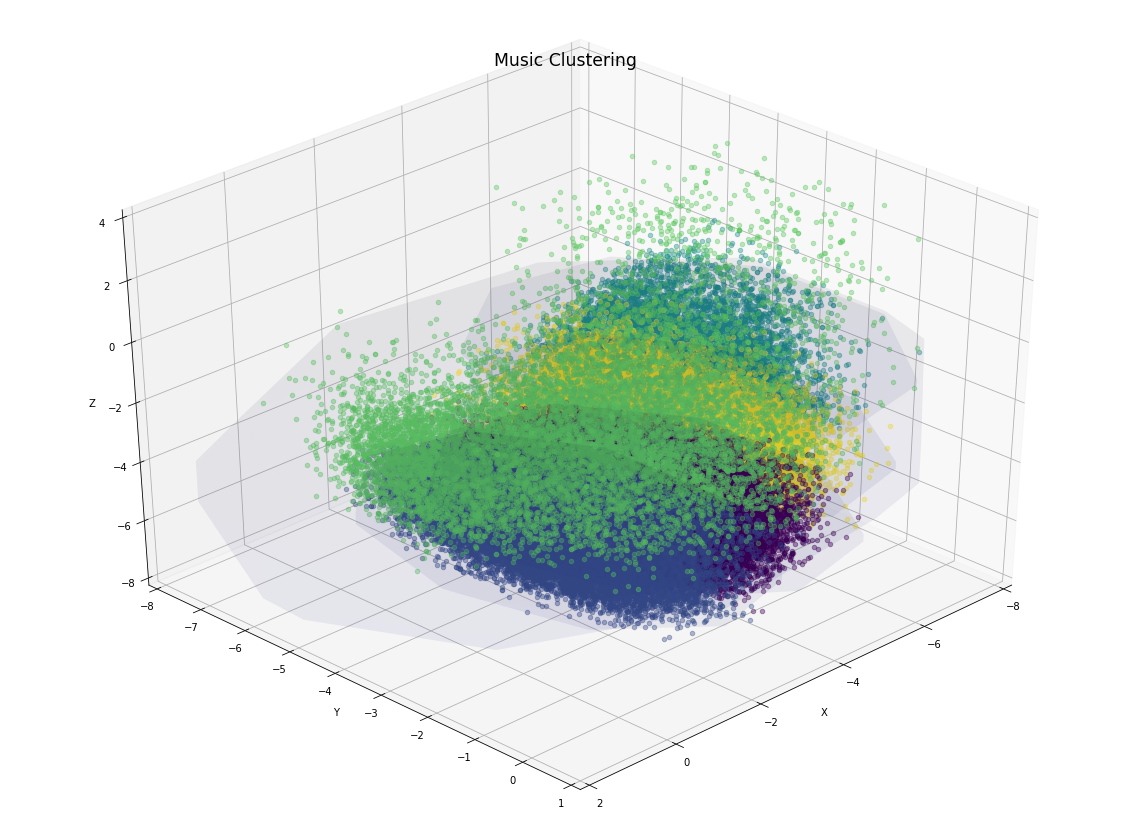

In [126]:
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
#matplotlib_axes_logger.setLevel('ERROR')
visualize_3d_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)

In [20]:
fa = pd.read_csv('factor_score.csv')
fa.columns = ['a','f1','f2','f3']

In [21]:
df1

,artist_names,artists_id,gerne,danceability,energy,valence,tempo,loudness,mode,key,...,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Unnamed: 20
0,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.600,0.365,0.131,130.046,-13.083,0,9,...,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,NaN
1,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.874,0.326,0.179,119.620,-13.302,0,11,...,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,NaN
2,"""Fat Freddy's Drop""",178301.0,Pop/Rock,0.670,0.531,0.336,139.385,-8.267,0,9,...,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,NaN
3,"""Alexander O'Neal""",625201.0,R&B;,0.761,0.702,0.850,104.773,-8.523,1,7,...,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,NaN
4,"""Alexander O'Neal""",625201.0,R&B;,0.661,0.828,0.902,115.078,-12.673,0,11,...,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,ZZ Top',690254.0,Pop/Rock,0.276,0.892,0.715,80.475,-7.035,1,11,...,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,NaN
98336,ZZ Top',690254.0,Pop/Rock,0.700,0.592,0.906,109.847,-10.434,1,11,...,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,NaN
98337,ZZ Top',690254.0,Pop/Rock,0.709,0.709,0.863,111.544,-12.023,1,2,...,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese,NaN
98338,ZZ Top',690254.0,Pop/Rock,0.552,0.651,0.533,161.548,-10.624,0,4,...,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,NaN


In [34]:
pop = pd.concat([df1.iloc[:,0:3],df1.iloc[:,16:18]], axis=1)
pop = pd.concat([pop,fa], axis=1)
pop

,artist_names,artists_id,gerne,popularity,year,a,f1,f2,f3
0,"""Fat Freddy's Drop""",178301.0,Pop/Rock,54,2005,0,-0.959169,-0.776090,-0.594865
1,"""Fat Freddy's Drop""",178301.0,Pop/Rock,53,2005,1,-0.664652,1.462626,-0.009904
2,"""Fat Freddy's Drop""",178301.0,Pop/Rock,55,2009,2,1.071929,0.482839,0.031469
3,"""Alexander O'Neal""",625201.0,R&B;,34,1991,3,1.809083,2.610395,-0.274728
4,"""Alexander O'Neal""",625201.0,R&B;,37,1987,4,1.536923,1.846327,0.263722
...,...,...,...,...,...,...,...,...,...
98335,ZZ Top',690254.0,Pop/Rock,33,1975,98335,2.121040,-0.838310,1.645456
98336,ZZ Top',690254.0,Pop/Rock,32,1976,98336,1.247093,2.228168,-0.063935
98337,ZZ Top',690254.0,Pop/Rock,31,1987,98337,1.332543,2.123122,-0.265555
98338,ZZ Top',690254.0,Pop/Rock,43,1992,98338,1.739246,0.694284,1.223833


In [36]:
a = pop['f1'].groupby(by=[pop["gerne"],pop["year"]]).mean()  #series
b = pop['f2'].groupby(by=[pop["gerne"],pop["year"]]).mean()  #series
c = pop['f3'].groupby(by=[pop["gerne"],pop["year"]]).mean()  #series
pop = pop['popularity'].groupby(by=[pop["gerne"],pop["year"]]).mean()  #series

In [41]:
final = pd.concat([a,b,c,pop], axis=1)
final.to_csv('final.csv')

In [53]:
df2 = pd.concat([df1.iloc[:,3:8],df1.iloc[:,9:14]], axis=1)
df2 = pd.concat([df1.iloc[:,0],df2], axis=1)
df2

,artist_names,danceability,energy,valence,tempo,loudness,key,acousticness,instrumentalness,liveness,speechiness
0,"""Fat Freddy's Drop""",0.600,0.365,0.131,130.046,-13.083,9,0.06720,0.585000,0.0921,0.0498
1,"""Fat Freddy's Drop""",0.874,0.326,0.179,119.620,-13.302,11,0.01360,0.148000,0.0993,0.1310
2,"""Fat Freddy's Drop""",0.670,0.531,0.336,139.385,-8.267,9,0.01560,0.345000,0.3060,0.0377
3,"""Alexander O'Neal""",0.761,0.702,0.850,104.773,-8.523,7,0.10800,0.000031,0.0935,0.0389
4,"""Alexander O'Neal""",0.661,0.828,0.902,115.078,-12.673,11,0.27600,0.000001,0.2870,0.0390
...,...,...,...,...,...,...,...,...,...,...,...
98335,ZZ Top',0.276,0.892,0.715,80.475,-7.035,11,0.40900,0.000000,0.7140,0.0893
98336,ZZ Top',0.700,0.592,0.906,109.847,-10.434,11,0.10800,0.018400,0.1180,0.0681
98337,ZZ Top',0.709,0.709,0.863,111.544,-12.023,2,0.11800,0.000011,0.1250,0.0370
98338,ZZ Top',0.552,0.651,0.533,161.548,-10.624,4,0.00494,0.034900,0.1320,0.2290


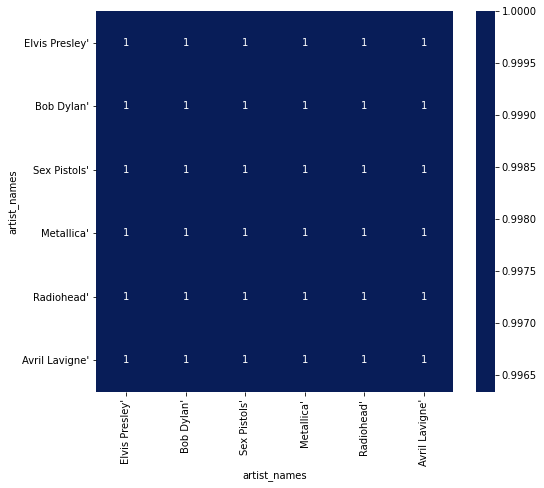

In [102]:
great =['Elvis Presley','Bob Dylan','Sex Pistols','Metallica','Radiohead','Avril Lavigne']
d = df2.groupby(by='artist_names').mean()
d = d.loc[["Elvis Presley'","Bob Dylan'","Sex Pistols'","Metallica'","Radiohead'","Avril Lavigne'"]]
df_corr = d.T.corr()

import matplotlib.pyplot as mp, seaborn
plt.figure(figsize=(8,7)) 
seaborn.heatmap(df_corr, center=0, annot=True, cmap='YlGnBu',)
mp.show()